In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [2]:
data = pd.read_csv('dataset.csv')
data.head()

,id,primary,Title,Autherkeywords,Indexkeywords,Author,AuthorsID,Volume,Issue,Year,...,LINK_CLICK_COUNT,LINK_OUTS,READER_COUNT,REFERENCE_COUNT,TWEET_COUNT,capture,citation,mention,socialMedia,usage
0,1,1.0,Toward a combined method for evaluation of web...,NaN,NaN,"Acosta-Vargas P., LujÃŒÃÅn-Mora S., Acosta T.,...",57192678428;6603381780;57200384739;57192689183;,NaN,NaN,2018,...,NaN,NaN,41.0,NaN,NaN,41.0,13.0,NaN,NaN,NaN
1,2,1.0,Evaluation of the quality and accessibility of...,NaN,NaN,"Valizadeh-Haghi S., Rahmatizadeh S.",57201397148;26423231100;,NaN,NaN,2018,...,NaN,NaN,31.0,NaN,1.0,31.0,11.0,NaN,1.0,NaN
2,3,1.0,Website accessibility in the tourism industry:...,NaN,NaN,"DomÃŒ_nguez Vila T., AlÃŒÂ©n GonzÃŒÃÅlez E., D...",55618623800;57209476703;8062952900;,NaN,NaN,2018,...,NaN,43.0,68.0,NaN,1.0,86.0,10.0,NaN,1.0,583.0
3,4,1.0,Methodology for heuristic evaluation of web ac...,NaN,NaN,"Orozco A., Tabares V., Duque N.",57190276125;55575533200;44061104100;,NaN,NaN,2016,...,NaN,NaN,22.0,NaN,NaN,22.0,5.0,NaN,NaN,NaN
4,5,1.0,Using WCAG 2.0 and heuristic evaluation to eva...,NaN,NaN,"Debevc M., KoÂÅ_uh I., Hauptman S., Klembas A....",56816724400;54412464700;56938486900;5700666390...,NaN,NaN,2015,...,NaN,NaN,23.0,NaN,NaN,23.0,5.0,NaN,NaN,NaN


In [3]:
cols_to_drop = ['id','Title', 'Author','Pagecount','Autherkeywords','AuthorsID','Volume','Issue','Pagestart','Pageend','Indexkeywords','Source', 'ENTRYTYPE', 'doi', 'url','Affiliations', 'Authors_affiliations', 'Address', 'Publisher', 'Language', 'AbbreviatedSource', 'Publication_Stage', 'Access_Type', 'EID',]
data.drop(cols_to_drop, axis=1, inplace=True)

In [4]:
emb_dummies = pd.get_dummies(data['Document_Type'], drop_first=True, prefix='Embarked')
data = pd.concat([data, emb_dummies], axis=1)
data.drop('Document_Type', axis=1, inplace=True)

emb_dummies = pd.get_dummies(data['Year'], drop_first=True, prefix='Year')
data = pd.concat([data, emb_dummies], axis=1)
data.drop('Year', axis=1, inplace=True)

In [10]:
data = data.fillna(0)
data.head()

,primary,citation_count,ABSTRACT_VIEWS,ALL_BLOG_COUNT,CITED_BY_COUNT,DOWNLOAD_COUNT,EXPORTS_SAVES,FACEBOOK_COUNT,FULL_TEXT_VIEWS,LINK_CLICK_COUNT,...,citation,mention,socialMedia,usage,Embarked_Book Chapter,Embarked_Conference Paper,Embarked_Review,Embarked_Book Chapter,Embarked_Conference Paper,Embarked_Review
0,1.0,12,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,...,13.0,0.0,0.0,0.0,0,1,0,0,1,0
1,1.0,11,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,...,11.0,0.0,1.0,0.0,0,0,0,0,0,0
2,1.0,10,540.0,0.0,10.0,0.0,18.0,0.0,0.0,0.0,...,10.0,0.0,1.0,583.0,0,0,0,0,0,0
3,1.0,5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0,1,0,0,1,0
4,1.0,5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0,1,0,0,1,0


In [11]:
correlated_features = set()
correlation_matrix = data.drop('primary', axis=1).corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [12]:

correlated_features

{'CITED_BY_COUNT',
 'EXPORTS_SAVES',
 'Embarked_Book Chapter',
 'Embarked_Conference Paper',
 'Embarked_Review',
 'LINK_OUTS',
 'REFERENCE_COUNT',
 'TWEET_COUNT',
 'capture',
 'citation',
 'mention',
 'socialMedia',
 'usage'}

In [13]:
X = data.drop('primary', axis=1)
target = data['primary']

rfc = RandomForestClassifier(random_state=101)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(X, target)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                       criterion='gini', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators='warn', n_jobs=None,
                                       oob_score=False, random_state=101,
                                       verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

In [14]:

print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 3


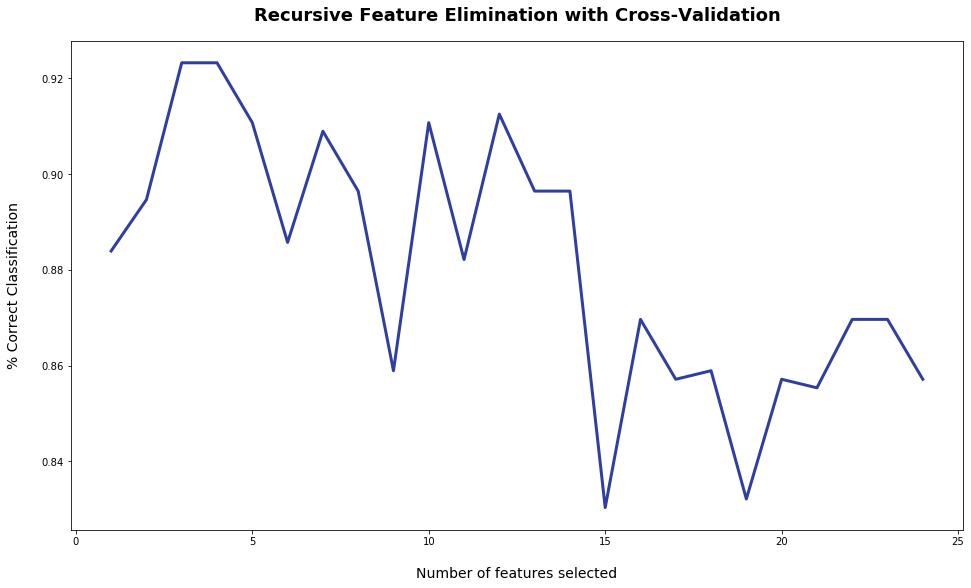

In [15]:

plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)
plt.show()

In [16]:
print(np.where(rfecv.support_ == False)[0])

X.drop(X.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

[ 1  2  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19 20 21 22 23]


In [17]:
rfecv.estimator_.feature_importances_

array([0.45249323, 0.29530512, 0.25220166])

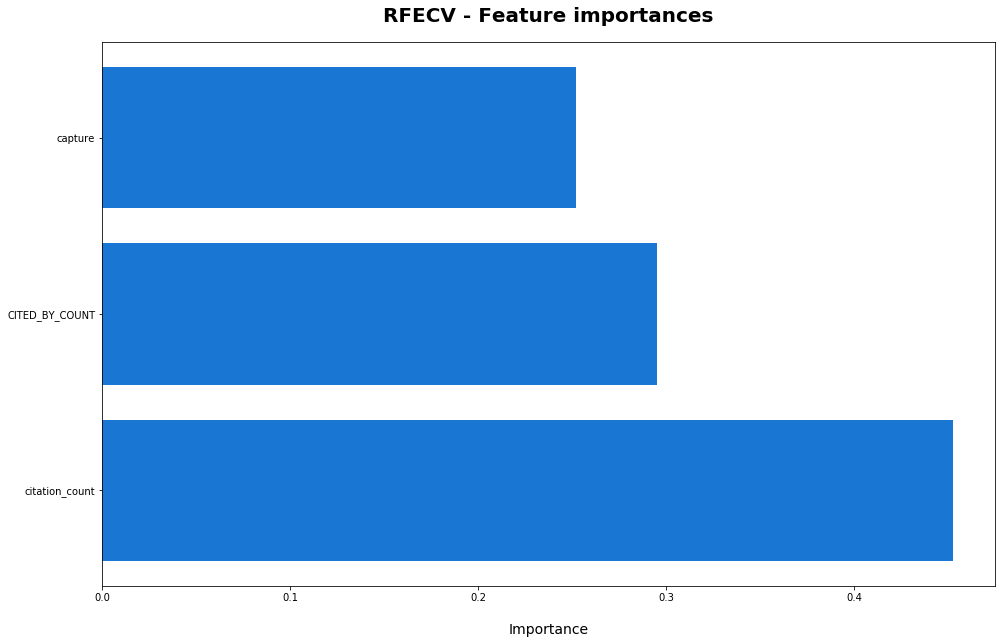

In [18]:

dset = pd.DataFrame()
dset['attr'] = X.columns
dset['importance'] = rfecv.estimator_.feature_importances_
dset = dset.sort_values(by='importance', ascending=False)

plt.figure(figsize=(16, 10))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()